In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import geopandas as gpd
import matplotlib.pyplot as plt 
from shapely.geometry import Point
import plotly.express as px
from geopandas import GeoDataFrame
import missingno

/kaggle/input/meteorite-landings/meteorite-landings.csv


In [92]:
# load data
data = pd.read_csv("../input/meteorite-landings/meteorite-landings.csv")
data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


<AxesSubplot:>

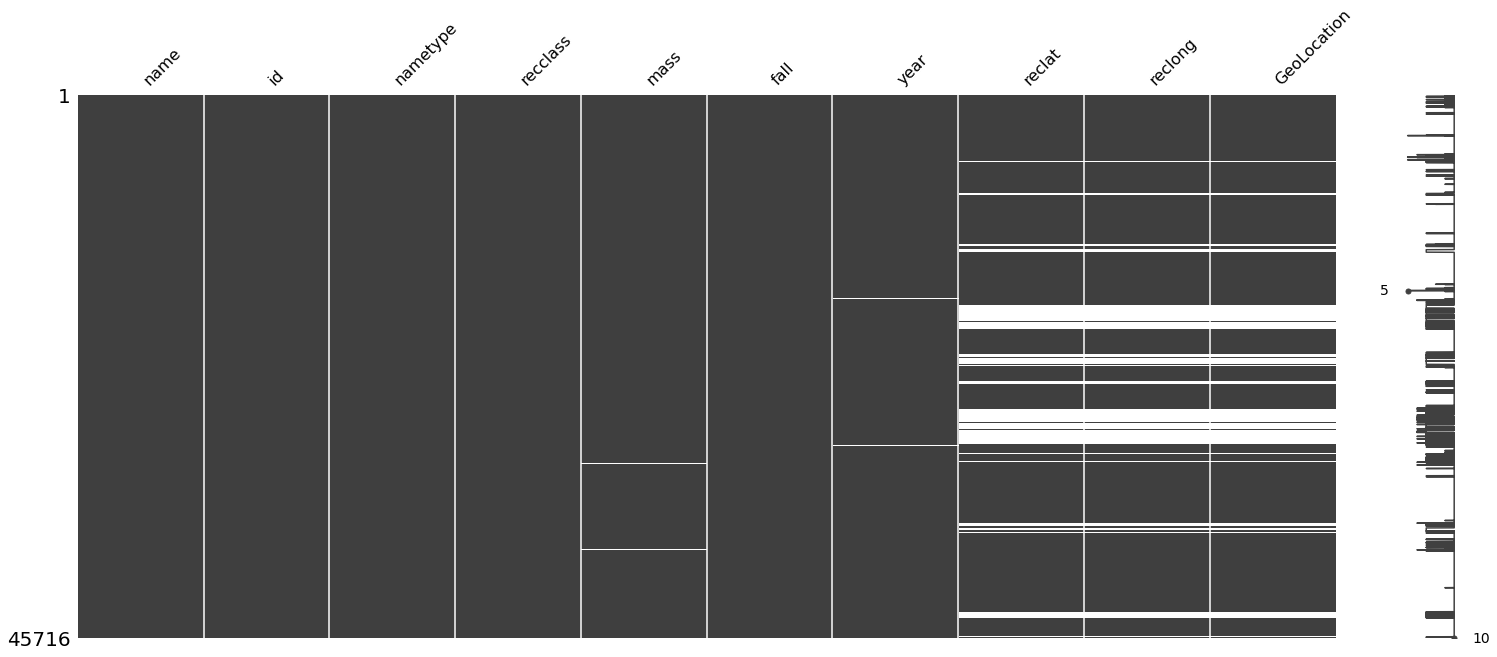

In [93]:
missingno.matrix(data)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


**Null values are present at: mass, reclat,reclong, GeoLoc and year columns**

<AxesSubplot:>

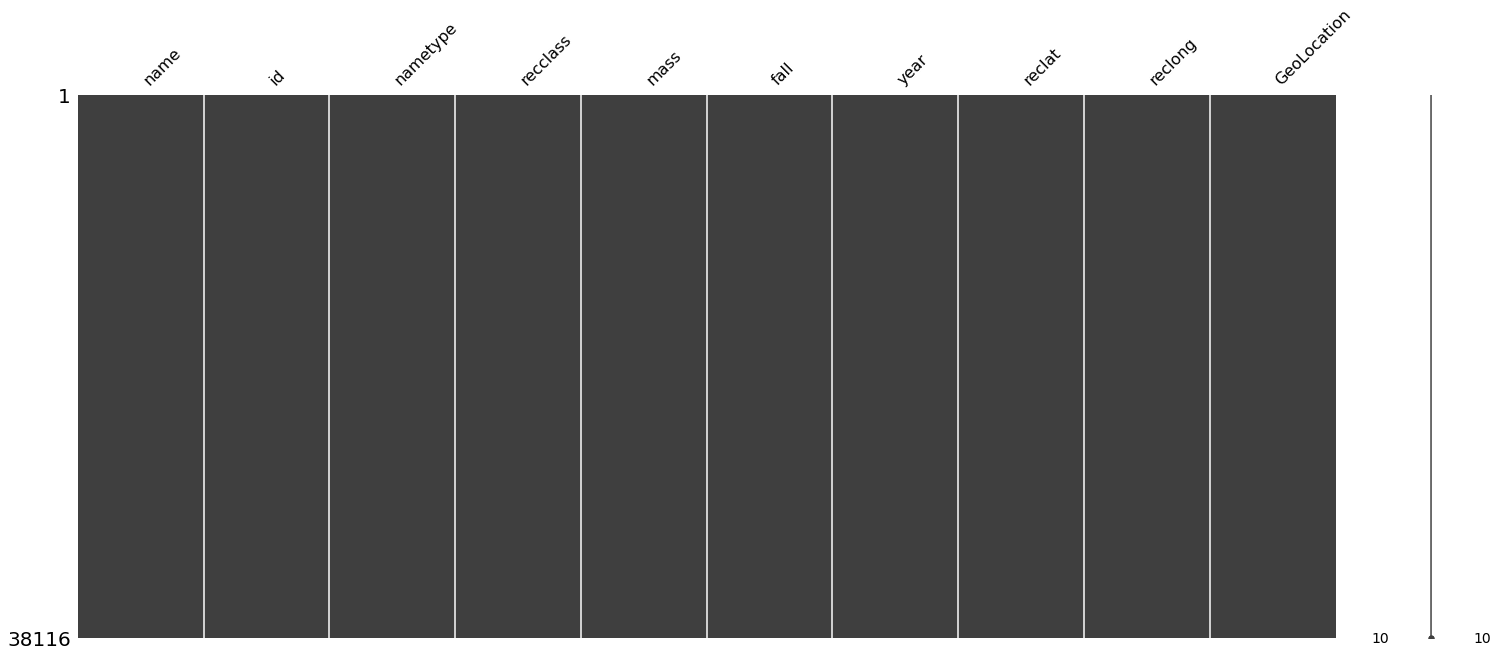

In [95]:
# drop any row that has a null values
data.dropna(inplace=True)
missingno.matrix(data)

In [96]:
data.describe()['mass']

count    3.811600e+04
mean     1.560031e+04
std      6.286735e+05
min      0.000000e+00
25%      6.630000e+00
50%      2.909000e+01
75%      1.874100e+02
max      6.000000e+07
Name: mass, dtype: float64

<AxesSubplot:xlabel='year'>

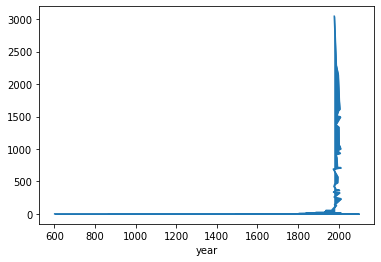

In [97]:
# Group nbr of meteorite falls by year and sort them accordingly
grouped_years_df = data.groupby(['year'])
numberMets_years = grouped_years_df.size()
numberMets_years.sort_values().plot.area()

**More falls where marked around the years 1990 - 2000**

In [98]:
# Calculate the mass of total falled meteorites for each year 
data["mass"] = data["mass"].replace('',np.nan).astype(float)
grouped_years_df = data.groupby(['year'])['mass'].sum()
#data.groupby(['year'])['mass'].head()
grouped_years_df.sort_values()

year
1817.0           0.2
1723.0          39.0
1668.0          40.0
2101.0          55.0
1490.0         103.3
             ...    
1898.0    28147293.5
1891.0    30655725.0
1575.0    50000000.0
1818.0    58231417.0
1920.0    60255072.0
Name: mass, Length: 254, dtype: float64

In [99]:
len(data.recclass.unique())

422

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



<AxesSubplot:>

<Figure size 1440x1224 with 0 Axes>

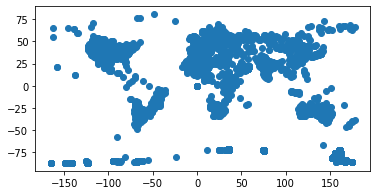

In [100]:
# Load your application data with Pandas
# Convert it to a GeoDataFrame by transforming the Latitude/Longitude coordinates 
data['reclong'] = pd.to_numeric(data['reclong'],errors='coerce')
data['reclat'] =  pd.to_numeric(data['reclat'],errors='coerce')
loc_crs = {'init': 'epsg:4326'}
loc_geom = [Point(xy) for xy in zip(data['reclong'], data['reclat'])]
geo_df = gpd.GeoDataFrame(data, crs=loc_crs, geometry=loc_geom)

# Plot the GeoDataFrame
plt.figure(figsize=(20,17))
geo_df.plot()

<AxesSubplot:>

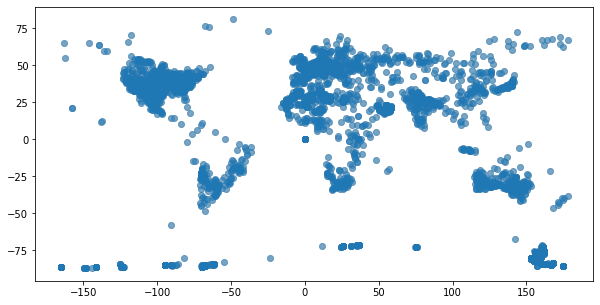

In [101]:
fig, ax = plt.subplots(figsize=(10,10))
# Plot the base map
geo_df.plot(ax=ax, color='lightgrey', zorder=1)
# Overlay the data locations
geo_df.plot(ax=ax, alpha=0.5, zorder=2)

<AxesSubplot:>

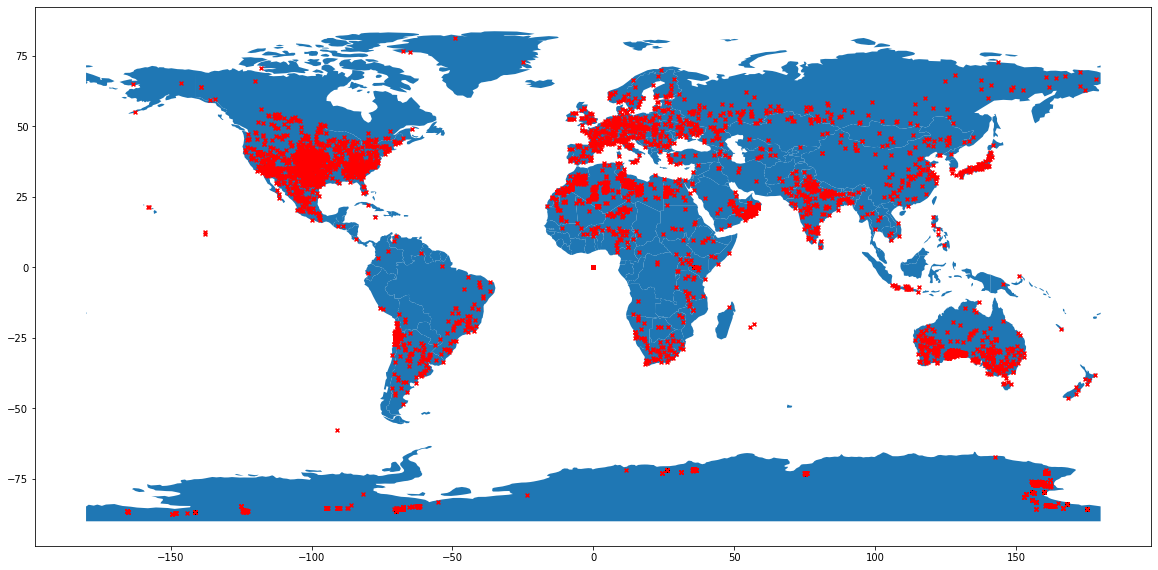

In [102]:
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_df.plot(ax=world.plot(figsize=(20, 10)), marker='x', color='red', markersize=15)

In [103]:
fig = px.scatter_geo(data,lat='reclat',lon='reclong', hover_name="id", labels='recclass')
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()